In [1]:
import pandas as pd

df = pd.read_csv("Blue_Bike_Stations.csv")

In [2]:
# !! I don't think we actually need to do this since we're dealing with distances (20/7)
# Add two columns to normalize the coordinates
# df["Add_minX"] = df[["X"]]-min(df["X"])
# df["Add_minY"] = df[["Y"]]-min(df["Y"])

In [2]:
print(df.shape)
print(df.head())

(427, 10)
              X             Y  Number                                 Name  \
0 -7.916449e+06  5.212672e+06  K32015                       1200 Beacon St   
1 -7.923242e+06  5.215762e+06  W32006                          160 Arsenal   
2 -7.918062e+06  5.215631e+06  A32019                     175 N Harvard St   
3 -7.915794e+06  5.218121e+06  S32035                        191 Beacon St   
4 -7.914260e+06  5.204349e+06  C32094  2 Hummingbird Lane at Olmsted Green   

    Latitude  Longitude    District Public_  Total_docks  ObjectId  
0  42.344149 -71.114674   Brookline     Yes           15         1  
1  42.364664 -71.175694   Watertown     Yes           11         2  
2  42.363796 -71.129164      Boston     Yes           18         3  
3  42.380323 -71.108786  Somerville     Yes           19         4  
4  42.288870 -71.095003      Boston     Yes           17         5  


In [3]:
# Drop the columns we won't need
df.drop(["Number","Latitude","Longitude","Public_","ObjectId"],axis=1,inplace=True)
# df.drop(["Add_minX","Add_minY"],axis=1,inplace=True)

In [6]:
print(df.shape)
print(df.head())

(425, 5)
              X             Y                                 Name  \
0 -7.916449e+06  5.212672e+06                       1200 Beacon St   
1 -7.923242e+06  5.215762e+06                          160 Arsenal   
2 -7.918062e+06  5.215631e+06                     175 N Harvard St   
3 -7.915794e+06  5.218121e+06                        191 Beacon St   
4 -7.914260e+06  5.204349e+06  2 Hummingbird Lane at Olmsted Green   

     District  Total_docks  
0   Brookline           15  
1   Watertown           11  
2      Boston           18  
3  Somerville           19  
4      Boston           17  


In [5]:
# Two entries had 0 total docks, no need to consider those
df.drop(df[df["Total_docks"]==0].index,inplace=True)

In [20]:
from numpy.ma.core import sqrt
def dist(x1,y1,x2,y2):
  x = pow(x1-x2,2)
  y = pow(y1-y2,2)
  return sqrt(x+y)

In [8]:
# a1 = df.iloc[0][["Add_minX","Add_minY"]].tolist()
# b1 = df.iloc[1][["Add_minX","Add_minY"]].tolist()
a1 = df.iloc[0][["X","Y"]].tolist()
b1 = df.iloc[1][["X","Y"]].tolist()
print(a1)
print(b1)

[-7916449.25419505, 5212671.5145918]
[-7923241.99846632, 5215761.83871611]


In [9]:
print(a1[0])

-7916449.25419505


In [10]:
dist(a1[0],a1[1],b1[0],b1[1])

7462.6723047555015

In [ ]:
# Get all distances
# distances = []
# for i in range(df.shape[0]):
#   for j in range(i+1,df.shape[0]):
#     # a = df.iloc[i][["Add_minX","Add_minY"]]#.tolist()
#     # b = df.iloc[j][["Add_minX","Add_minY"]]#.tolist()
#     a = df.iloc[0][["X","Y"]].tolist()
#     b = df.iloc[1][["X","Y"]].tolist()
#     distances.append(dist(a[0],a[1],b[0],b[1]))

In [ ]:
# tempD = {}
# tempD[(tuple(a1),tuple(b1))] = distances[-1]
# print(tempD)

{((14815.049053790048, 13327.199873380363), (8022.304782520048, 16417.52399769053)): 4860.852940082774}


In [11]:
distDict = {}
pointsDict = {}
distances = []
for i in range(df.shape[0]):
  pointsDict[i] = df.iloc[i][["X","Y"]].tolist()
  for j in range(i+1,df.shape[0]):
    # a = df.iloc[i][["Add_minX","Add_minY"]].tolist()
    # b = df.iloc[j][["Add_minX","Add_minY"]].tolist()
    a = df.iloc[i][["X","Y"]].tolist()
    b = df.iloc[j][["X","Y"]].tolist()
    di = dist(a[0],a[1],b[0],b[1])
    distDict[(i,j)] = di
    distances.append(di)
print(len(distDict))

90100


```
## distDict is of the form - 
(0,1) : 7462, (0,2) : 8839 ....(423,424) : 3849
ie (a,b):dist(a,b), where a and b range from 0 to 424

## pointsDict is of the form - 
0 : [x0,y0], 1 : [x1,y1] ...
ie a:[x,y] where a ranges from 0 to 424 and x and y are its coordinates

## distances is of the form - 
[5343,22903,22904...]
It is simply a 1D array of _all_ the distances
```

In [12]:
print(len(distances))
print(max(distances))
print(min(distances))
print(sum(distances)/len(distances))

90100
50699.23620739128
33.95196850170113
9464.065869467226


In [13]:
(423,425) in distDict

False

In [21]:
# For dumping the dictionary into a pickle file
import pickle
f = open("Distance dictionary.pkl","wb")
pickle.dump(distDict,f)
f.close()

In [1]:
# For loading the dictionary from a pickle file
import pickle
f = open("Distance dictionary.pkl","rb")
distDict = pickle.load(f)
print(len(distDict))

90100


In [15]:
print(pointsDict)

{0: [-7916449.25419505, 5212671.5145918], 1: [-7923241.99846632, 5215761.83871611], 2: [-7918062.31703125, 5215631.0608375], 3: [-7915793.86291939, 5218121.39090942], 4: [-7914259.53190626, 5204349.46890637], 5: [-7915263.88195568, 5218223.57754792], 6: [-7915306.93699513, 5216686.7909059], 7: [-7916957.58240461, 5201224.51067718], 8: [-7915898.37744972, 5203884.49655678], 9: [-7908122.17334467, 5212314.85603592], 10: [-7920238.85129996, 5217319.55464976], 11: [-7911279.4701759, 5222810.63495878], 12: [-7915251.63792488, 5213493.96340703], 13: [-7920841.39810015, 5218191.43915247], 14: [-7912604.72314782, 5215888.88646318], 15: [-7919707.2851467, 5220122.38249317], 16: [-7906345.40963128, 5220848.59180053], 17: [-7915927.6322119, 5216407.86452531], 18: [-7910058.38553068, 5204772.24186421], 19: [-7905368.85605871, 5218853.53383933], 20: [-7907166.9330018, 5217370.72487295], 21: [-7911358.72408737, 5211541.83218866], 22: [-7919558.68921122, 5220422.10987684], 23: [-7919208.35118896, 522

In [16]:
counter = 0
for k,v in distDict.items():
  print(k,v)
  counter += 1
  if counter == 5:
    break

(0, 1) 7462.6723047555015
(0, 2) 3370.591297378705
(0, 3) 5489.14288405483
(0, 4) 8605.308134657902
(0, 5) 5677.192124156757


In [19]:
distDF = pd.DataFrame(distances,columns=["Distances"])
distDF.to_csv("Dist.csv")

In [23]:
threshold = 3500

# Drop edges above threshold
delKeys = []
for k,v in distDict.items():
  if v>threshold:
    delKeys.append(k)
for key in delKeys:
  del distDict[key]

print(len(distDict))

f = open("Trimmed distance dictionary.pkl","wb")
pickle.dump(distDict,f)
f.close()

12270


In [28]:
# Just to check if all nodes are present or not
nodeSet = set()
for k in distDict:
  nodeSet.add(k[0])
  nodeSet.add(k[1])

In [29]:
print(nodeSet)
print(len(nodeSet))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

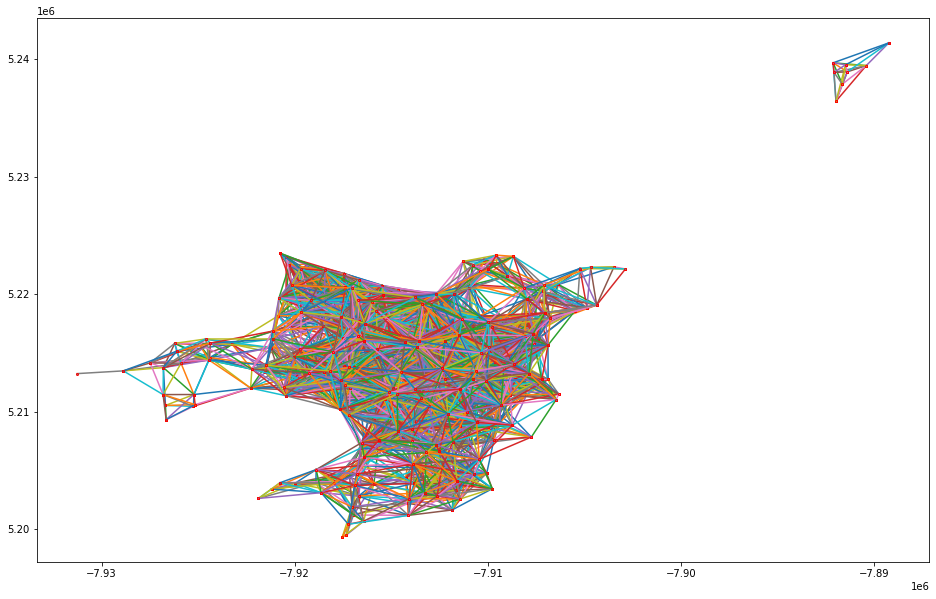

In [35]:
import matplotlib.pyplot as plt

# Plotting all edges in the dictionary to check for unconnected components
plt.figure(figsize=(16,10))
for k in distDict:
  x = [pointsDict[k[0]][0],pointsDict[k[1]][0]]
  y = [pointsDict[k[0]][1],pointsDict[k[1]][1]]
  plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red")

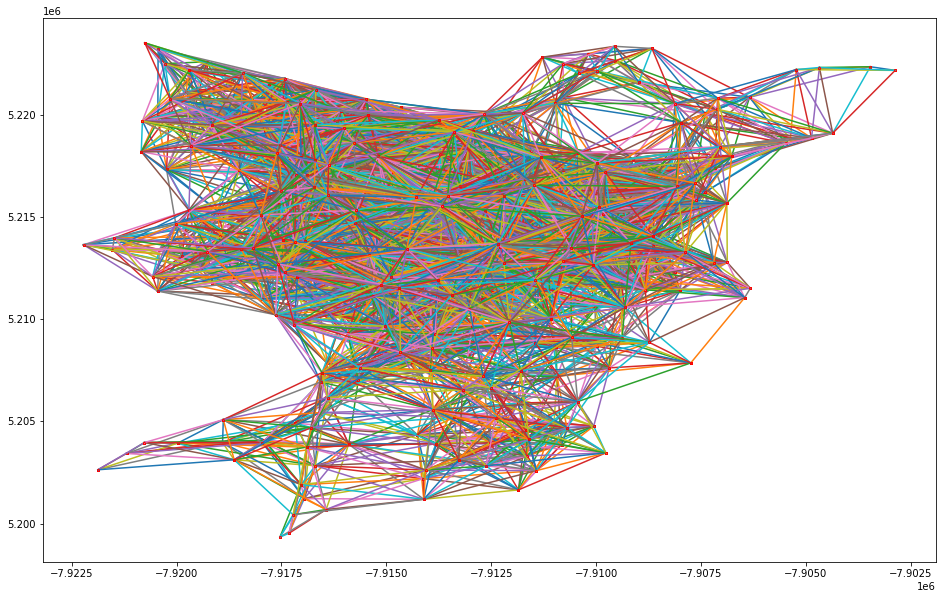

In [42]:
# For making graphs without some districts
plt.figure(figsize=(16,10))
districts = ["Watertown","Newton","Salem"]
for k in distDict:
  if df.iloc[k[0]]["District"] in districts or df.iloc[k[1]]["District"] in districts:
    continue
  x = [pointsDict[k[0]][0],pointsDict[k[1]][0]]
  y = [pointsDict[k[0]][1],pointsDict[k[1]][1]]
  plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red")